In [1]:
#Call Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#upload the dataset
df=pd.read_csv('Automobile_data.csv')

In [3]:
df.shape

(205, 15)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [6]:
df.corr()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
symboling,1.000000,-0.232919,-0.541038,-0.105790,-0.035823,0.034606,-0.085781
width,-0.232919,1.000000,0.279210,0.735433,-0.642704,-0.677218,0.718253
height,-0.541038,0.279210,1.000000,0.067149,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.735433,0.067149,1.000000,-0.653658,-0.677470,0.852995
city-mpg,-0.035823,-0.642704,-0.048640,-0.653658,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.677218,-0.107358,-0.677470,0.971337,1.000000,-0.679048
price,-0.085781,0.718253,0.132444,0.852995,-0.654611,-0.679048,1.000000


In [7]:
catdf=df.select_dtypes(object)

In [8]:
catdf.shape

(205, 8)

In [9]:
catdf.head()

,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower
0,?,alfa-romero,gas,convertible,rwd,front,dohc,111
1,?,alfa-romero,gas,convertible,rwd,front,dohc,111
2,?,alfa-romero,gas,hatchback,rwd,front,ohcv,154
3,164,audi,gas,sedan,fwd,front,ohc,102
4,164,audi,gas,sedan,4wd,front,ohc,115


In [10]:
for i in catdf:
    print(i)
    print(catdf[i].unique())
    print()

normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type
['gas' 'diesel']

body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels
['rwd' 'fwd' '4wd']

engine-location
['front' 'rear']

engine-type
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

horsepower
['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200

In [11]:
df['normalized-losses']=df['normalized-losses'].replace('?',np.nan)

In [12]:
df['normalized-losses']=df['normalized-losses'].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 24.1+ KB


In [14]:
df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower']=df['horsepower'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


In [15]:
df['normalized-losses'].median()

115.0

In [16]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].median())

In [17]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [18]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.457484,-0.232919,-0.541038,-0.105790,0.071064,-0.035823,0.034606,-0.085781
normalized-losses,0.457484,1.000000,0.058378,-0.365674,0.072536,0.166964,-0.189530,-0.149357,0.093477
width,-0.232919,0.058378,1.000000,0.279210,0.735433,0.641337,-0.642704,-0.677218,0.718253
height,-0.541038,-0.365674,0.279210,1.000000,0.067149,-0.109286,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.072536,0.735433,0.067149,1.000000,0.810216,-0.653658,-0.677470,0.852995
horsepower,0.071064,0.166964,0.641337,-0.109286,0.810216,1.000000,-0.802170,-0.770780,0.747445
city-mpg,-0.035823,-0.189530,-0.642704,-0.048640,-0.653658,-0.802170,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.149357,-0.677218,-0.107358,-0.677470,-0.770780,0.971337,1.000000,-0.679048
price,-0.085781,0.093477,0.718253,0.132444,0.852995,0.747445,-0.654611,-0.679048,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


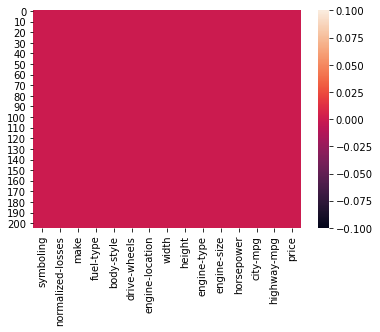

In [20]:
plt.figure()
sns.heatmap(df.isnull())
plt.show()

In [21]:
#There are no null values as well as unwanted values available

In [22]:
numdf=df.select_dtypes(['int64','float64','int32'])

In [23]:
numdf.shape

(205, 9)

symboling


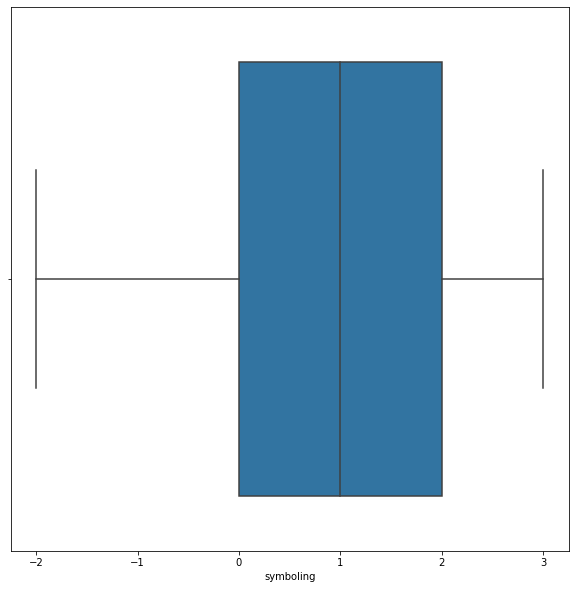


normalized-losses


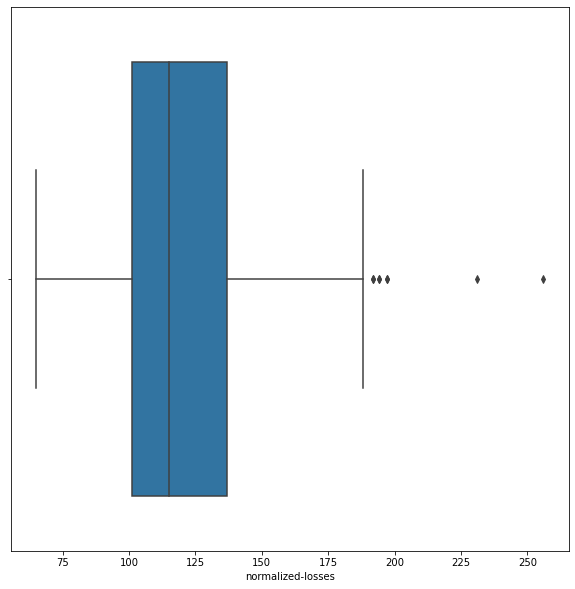


width


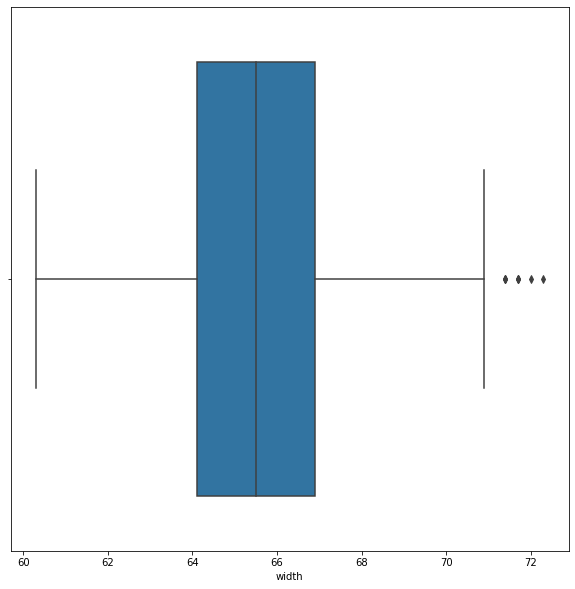


height


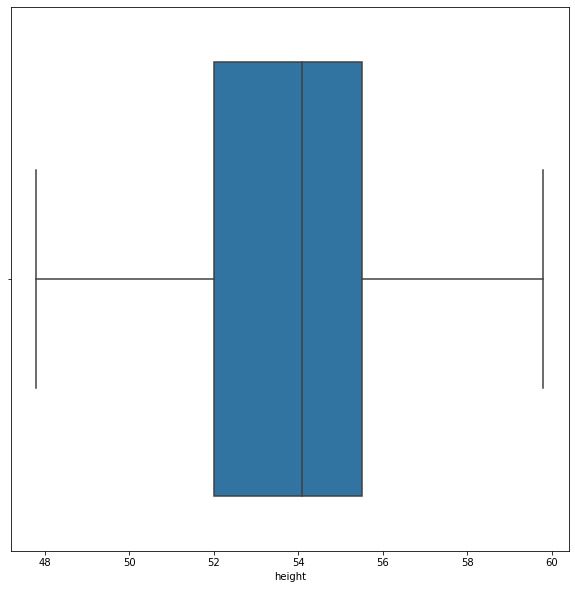


engine-size


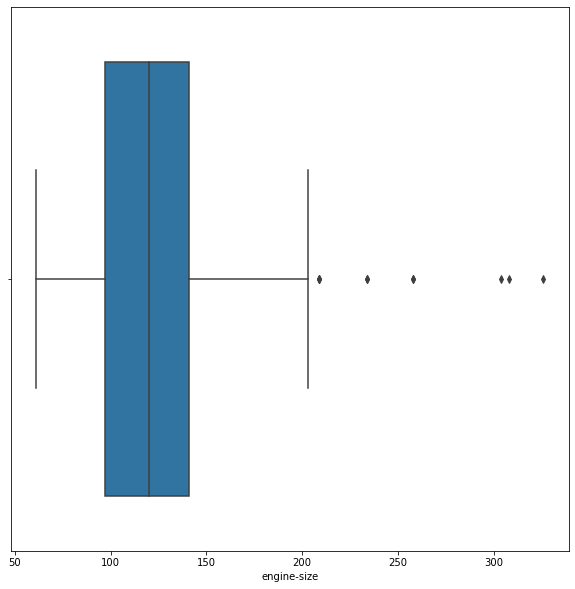


horsepower


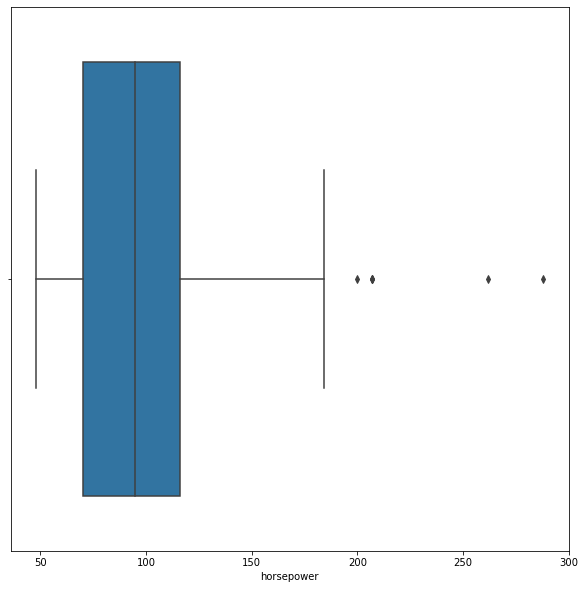


city-mpg


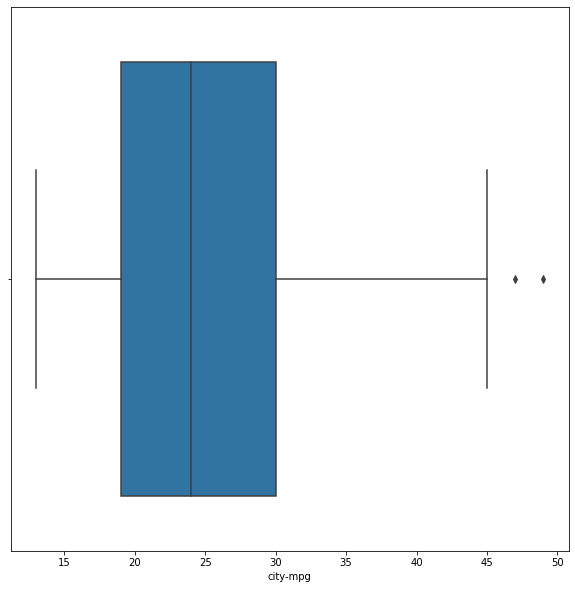


highway-mpg


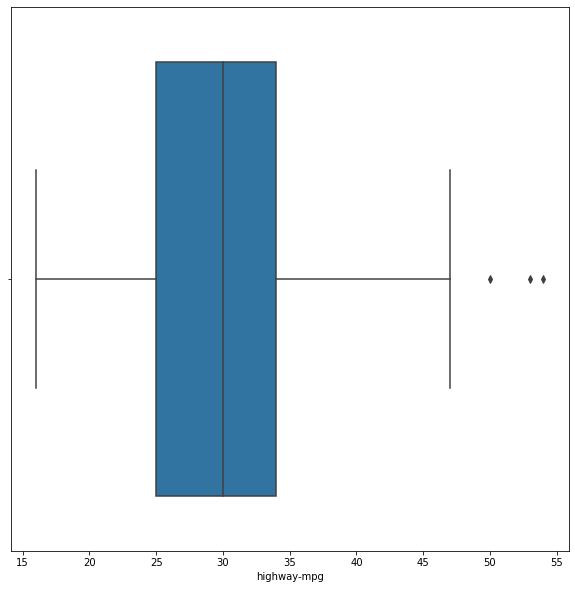


price


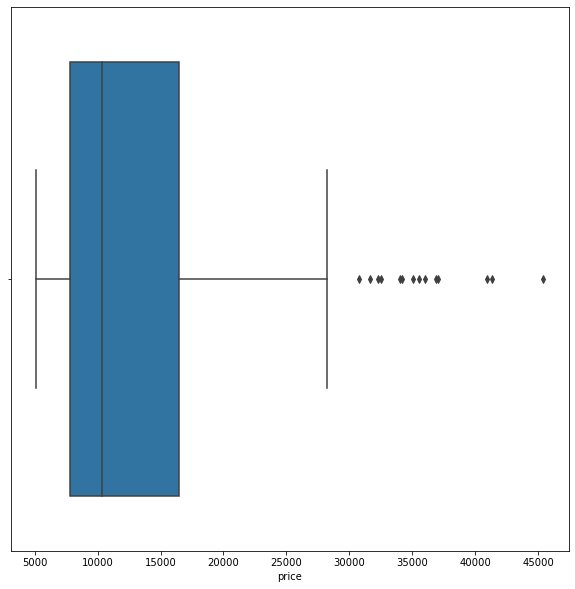

In [24]:
#Check Outliers
for i in numdf:
    print(i)
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df,x=i)
    plt.show()
    print()

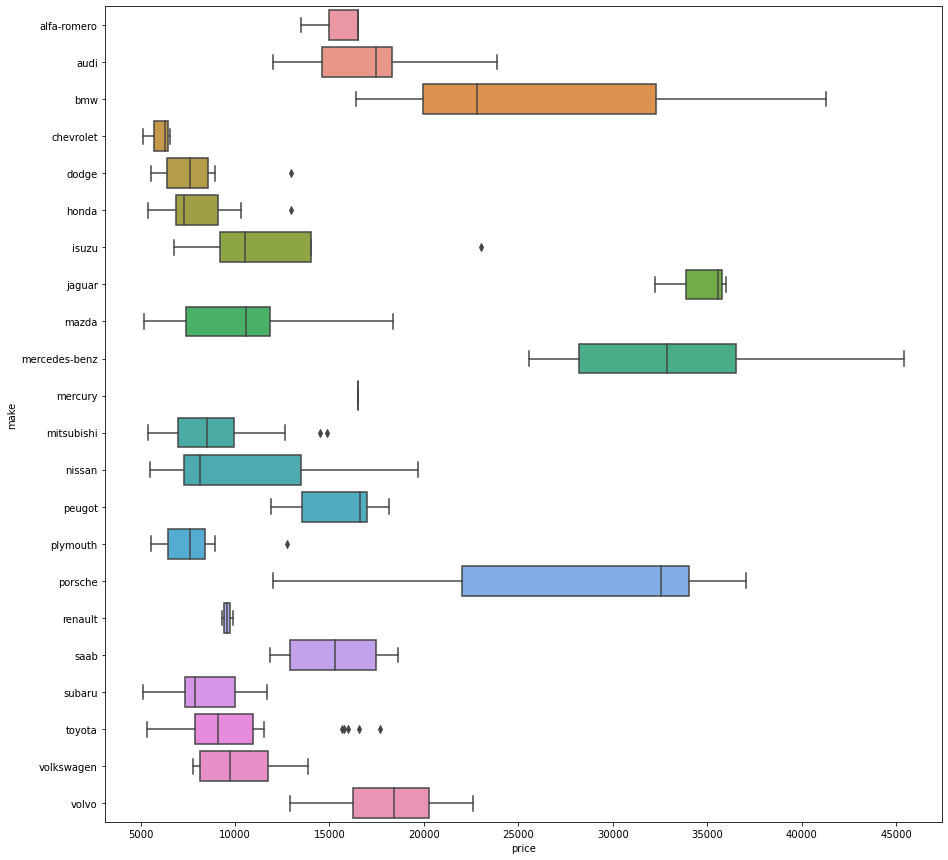

In [25]:
#Check outliers with respect to make in price
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='price',y='make')
plt.show()

In [26]:
df[(df['make']=='dodge') & (df['price']>9000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [27]:
df=df.drop(29)

In [28]:
df[(df['make']=='honda') & (df['price']>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [29]:
df=df.drop(41)

In [30]:
df[(df['make']=='isuzu') & (df['price']>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,115.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [31]:
df=df.drop(45)

In [32]:
df[(df['make']=='mitsubishi') & (df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,115.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,115.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [33]:
df=df.drop([83,84])

In [34]:
df[(df['make']=='plymouth') & (df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,115.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [35]:
df=df.drop(124)

In [36]:
df[(df['make']=='toyota') & (df['price']>12500)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,115.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [37]:
df=df.drop([172,178,179,180,181])

In [38]:
# Check skewness
df.shape

(194, 15)

In [39]:
#Separate numerical and categorical data
numdf=df.select_dtypes(['int64','int32','float64'])
catdf=df.select_dtypes('object')

In [40]:
numdf.shape

(194, 9)

In [41]:
catdf.shape

(194, 6)

In [42]:
from scipy.stats import skew

In [43]:
for i in numdf:
    print(i)
    print(skew(numdf[i]))
    print()

symboling
0.21386866184357742

normalized-losses
0.9632059441735282

width
0.9140400320504322

height
0.013839962443639326

engine-size
2.0541257626466156

horsepower
1.5620892525023995

city-mpg
0.5999073033714895

highway-mpg
0.4760310091695327

price
1.8166794702973463



In [44]:
# Before remove skewness see the correlation of features if the corelation of any feature is high 
# then don't remove skewness of that feature

In [45]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.442174,-0.272388,-0.521495,-0.153671,0.026640,0.007189,0.084238,-0.095905
normalized-losses,0.442174,1.000000,0.039193,-0.367588,0.050839,0.146712,-0.182300,-0.139384,0.089790
width,-0.272388,0.039193,1.000000,0.296011,0.735112,0.643063,-0.641401,-0.677911,0.730503
height,-0.521495,-0.367588,0.296011,1.000000,0.096041,-0.077263,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.050839,0.735112,0.096041,1.000000,0.803449,-0.642711,-0.667078,0.869638
horsepower,0.026640,0.146712,0.643063,-0.077263,0.803449,1.000000,-0.796130,-0.760884,0.769844
city-mpg,0.007189,-0.182300,-0.641401,-0.078815,-0.642711,-0.796130,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.139384,-0.677911,-0.142926,-0.667078,-0.760884,0.970113,1.000000,-0.704846
price,-0.095905,0.089790,0.730503,0.147010,0.869638,0.769844,-0.680412,-0.704846,1.000000


In [46]:
# Remove skewness of normalized-losses feature because it has low correlation using sqrt method

In [47]:
df['normalized-losses']=np.sqrt(df['normalized-losses'])

In [48]:
print(skew(df['normalized-losses']))

0.5411036364044417


In [49]:
#Do Label Encoding to categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in catdf:
    catdf[i]=le.fit_transform(catdf[i])

In [50]:
#Concat numerical data and categorcal data
newdf=pd.concat([catdf,numdf],axis=1)

In [51]:
newdf.shape

(194, 15)

In [52]:
newdf.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,115.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,115.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,115.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [53]:
# Do standard Scaling to the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in newdf:
    newdf[i]=ss.fit_transform(newdf[[i]])

In [54]:
newdf.corr()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
make,1.000000,-0.119746,0.109203,-0.052044,0.057249,0.010788,-0.133413,-0.272131,-0.013582,0.243751,-0.100960,-0.088873,0.079432,0.075333,-0.173792
fuel-type,-0.119746,1.000000,-0.146577,-0.143825,0.042490,0.112181,0.194923,0.103625,-0.238744,-0.279480,-0.081435,0.154634,-0.253782,-0.185979,-0.115791
body-style,0.109203,-0.146577,1.000000,-0.149962,-0.291270,-0.033920,-0.584658,-0.231156,0.145147,0.574268,-0.057853,-0.144763,0.015181,-0.024926,-0.065831
drive-wheels,-0.052044,-0.143825,-0.149962,1.000000,0.154729,-0.053643,-0.055088,0.278529,0.470463,-0.016925,0.518208,0.512652,-0.448046,-0.450402,0.584485
engine-location,0.057249,0.042490,-0.291270,0.154729,1.000000,0.116897,0.231375,-0.020356,-0.051210,-0.114057,0.204366,0.334518,-0.161467,-0.109265,0.333620
engine-type,0.010788,0.112181,-0.033920,-0.053643,0.116897,1.000000,0.070345,-0.029446,0.048240,-0.162899,0.109809,0.101920,-0.152574,-0.152407,0.102758
symboling,-0.133413,0.194923,-0.584658,-0.055088,0.231375,0.070345,1.000000,0.442174,-0.272388,-0.521495,-0.153671,0.026640,0.007189,0.084238,-0.095905
normalized-losses,-0.272131,0.103625,-0.231156,0.278529,-0.020356,-0.029446,0.442174,1.000000,0.039193,-0.367588,0.050839,0.146712,-0.182300,-0.139384,0.089790
width,-0.013582,-0.238744,0.145147,0.470463,-0.051210,0.048240,-0.272388,0.039193,1.000000,0.296011,0.735112,0.643063,-0.641401,-0.677911,0.730503
height,0.243751,-0.279480,0.574268,-0.016925,-0.114057,-0.162899,-0.521495,-0.367588,0.296011,1.000000,0.096041,-0.077263,-0.078815,-0.142926,0.147010


# Apply Basic Line Model - LinearRegression

In [55]:
#separate Independant and Dependant features
X=newdf.drop('price',axis=1)
Y=newdf['price']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [58]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [59]:
Y_predict=lr.predict(X_test)

In [60]:
mse=mean_squared_error(Y_test,Y_predict)
print(mse)

0.25640756972584816


In [61]:
print('Train score = ',lr.score(X_train,Y_train))
print('Test score = ',lr.score(X_test,Y_test))

Train score =  0.8951180753657108
Test score =  0.7976598465335488


In [62]:
# Use Wrapper Method - Forward and Backward
#Forward Method
col=[]
for i in newdf:
    col.append(i)
    print(col)
    X=newdf[col]
    Y=newdf['price']
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    print('Train score = ',lr.score(X_train,Y_train))
    print('Test score = ',lr.score(X_test,Y_test))
    print()

['make']
Train score =  0.02300034027034137
Test score =  0.020511675151937525

['make', 'fuel-type']
Train score =  0.03629032168275459
Test score =  0.04634700547958159

['make', 'fuel-type', 'body-style']
Train score =  0.037674679107859155
Test score =  0.02881562894894807

['make', 'fuel-type', 'body-style', 'drive-wheels']
Train score =  0.342155679034465
Test score =  0.35938460504916614

['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location']
Train score =  0.3876486045460429
Test score =  0.5090845278584566

['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location', 'engine-type']
Train score =  0.40601363224657316
Test score =  0.5102963727717624

['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'symboling']
Train score =  0.41604421155323645
Test score =  0.5266981435396589

['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'symboling', 'normalized-losses']
Train score =  0.41

In [63]:
#Backward Method
col=newdf.drop('price',axis=1)
col=list(col.columns)
n=len(col)
for i in range(n):
    print(col)
    X=newdf[col]
    Y=newdf['price']
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    print('Train score = ',lr.score(X_train,Y_train))
    print('Test score = ',lr.score(X_test,Y_test))
    del col[0]
    print()    

['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'symboling', 'normalized-losses', 'width', 'height', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
Train score =  0.8951180753657108
Test score =  0.7976598465335488

['fuel-type', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'symboling', 'normalized-losses', 'width', 'height', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
Train score =  0.8848720930553201
Test score =  0.7708024066699424

['body-style', 'drive-wheels', 'engine-location', 'engine-type', 'symboling', 'normalized-losses', 'width', 'height', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
Train score =  0.8833696889514531
Test score =  0.7690704769551141

['drive-wheels', 'engine-location', 'engine-type', 'symboling', 'normalized-losses', 'width', 'height', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
Train score =  0.883166705722877
Test score =  0.770021185190616

['engine-locat

In [64]:
# As per above analysis important features are 'engine-size','highway-mpg','engine-location','drive-wheels','make','width'

In [65]:
#Use Feature Selection Technique - to create "area" feature by multiply width and height
newdf['area']=newdf['width']*newdf['height']

In [66]:
X=newdf[['engine-size','highway-mpg','engine-location','drive-wheels','make','area']]
Y=newdf['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(X_train,Y_train)
print('Train score = ',lr.score(X_train,Y_train))
print('Test score = ',lr.score(X_test,Y_test))
Y_predict=lr.predict(X_test)

Train score =  0.860618198691484
Test score =  0.8154306178887666


In [67]:
mse=mean_squared_error(Y_test,Y_predict)

In [68]:
print("MSE=",mse)

MSE= 0.23388826143590655


In [69]:
'''
Train score =  0.860618198691484
Test score =  0.8154306178887666

'''

'\nTrain score =  0.860618198691484\nTest score =  0.8154306178887666\n\n'